In [53]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
import seaborn as sns
from sklearn.metrics import accuracy_score

In [2]:
from sklearn.preprocessing import LabelEncoder
# evaluation imports

In [3]:
df=pd.read_csv('DS2_C5_S6_AllRent_Data_Challenge.csv ')

In [4]:
df.head()

,Unnamed: 0,bathrooms,bedrooms,building_id,created,description,display_address,features,latitude,listing_id,longitude,manager_id,photos,price,street_address,interest_level
0,105408,1.0,0,0f9d07991ba14c82d3d368b72d90270a,04-04-2016 03:34,Gorgeous unit in one of the most genuinely cov...,230 Central Park South,"['Cats Allowed', 'Dogs Allowed', 'Doorman', 'E...",40.7672,6827153,-73.9802,932589de9230b697808216774fa26bd4,['https://photos.renthop.com/2/6821519_0a14cc2...,2800,230 Central Park South,high
1,110219,1.0,1,564d6f608f41e8d4a5e181c4e068e3d9,21-04-2016 20:40,Enormous 1 bedroom apartment in Murray Hill. F...,E 39th St,"['Cats Allowed', 'Dogs Allowed', 'Reduced Fee'...",40.7483,6908998,-73.9741,489ad933197469ae66acd1f7ce18f908,['https://photos.renthop.com/2/6908998_6b00895...,2100,243 E 39th St,high
2,56113,1.0,1,69790fbf0bf7e22b1d0ebc721cf0f633,14-05-2016 05:44,"This 1 bedroom, 1 bathroom spacious apartment ...",E 25th St.,"['Elevator', 'Furnished', 'Hardwood Floors']",40.7399,7013774,-73.9812,792c0f1ad1431397c65db3e69b770928,['https://photos.renthop.com/2/7013774_e7ead5d...,3000,217 E 25th St.,high
3,37765,1.0,2,d0234abbc01a982d54e8d446acc03405,05-06-2016 03:37,SPECTACULAR2 BEDROOM APARTMENT IN LUXURY 24HR ...,West 34th Street,"['Doorman', 'Elevator', 'Dishwasher', 'Hardwoo...",40.7530,7113518,-73.9958,eb5a6c4c2eb6f3e2a085c477afd5a815,['https://photos.renthop.com/2/7113518_d234153...,3000,360 West 34th Street,high
4,67397,1.0,2,a36895b9975c6991ca0fa1d9a99023a1,26-05-2016 05:36,NO FEE.. Newly Reno XL Convertible 2 Br .. Pri...,East 72nd Street,"['Dining Room', 'Doorman', 'Elevator', 'Fitnes...",40.7695,7071666,-73.9603,0a6ba20b892ed61df751420934d1ab51,['https://photos.renthop.com/2/7071666_4f81618...,3300,200 East 72nd Street,high


In [5]:
# All columns
columns = df.columns
columns

Index(['Unnamed: 0', 'bathrooms', 'bedrooms', 'building_id', 'created',
       'description', 'display_address', 'features', 'latitude', 'listing_id',
       'longitude', 'manager_id', 'photos', 'price', 'street_address',
       'interest_level'],
      dtype='object')

In [6]:
df.shape

(9871, 16)

In [7]:
df.describe()

,Unnamed: 0,bathrooms,bedrooms,latitude,listing_id,longitude,price
count,9871.000000,9871.000000,9871.000000,9871.000000,9.871000e+03,9871.000000,9871.000000
mean,61828.973154,1.210617,1.533685,40.747167,7.024062e+06,-73.965549,3662.860804
std,35901.607107,0.501985,1.106696,0.414548,1.269108e+05,0.760686,2559.911997
min,9.000000,0.000000,0.000000,0.000000,6.812005e+06,-87.613400,43.000000
25%,30968.000000,1.000000,1.000000,40.727500,6.914494e+06,-73.992200,2499.000000
50%,61354.000000,1.000000,1.000000,40.750600,7.022816e+06,-73.978300,3125.000000
75%,93229.500000,1.000000,2.000000,40.773900,7.130978e+06,-73.955100,4047.500000
max,123995.000000,10.000000,8.000000,43.034600,7.742631e+06,0.000000,90000.000000


In [8]:
df=df[['bathrooms', 'bedrooms',
        'latitude', 'listing_id',
       'longitude', 'price',
       'interest_level']]

In [9]:
df.head()

,bathrooms,bedrooms,latitude,listing_id,longitude,price,interest_level
0,1.0,0,40.7672,6827153,-73.9802,2800,high
1,1.0,1,40.7483,6908998,-73.9741,2100,high
2,1.0,1,40.7399,7013774,-73.9812,3000,high
3,1.0,2,40.7530,7113518,-73.9958,3000,high
4,1.0,2,40.7695,7071666,-73.9603,3300,high


In [10]:
label_encoder = preprocessing.LabelEncoder()
df['interest_level'] = label_encoder.fit_transform(df['interest_level'])

In [11]:
from sklearn.preprocessing import StandardScaler,MinMaxScaler
scaler=StandardScaler()

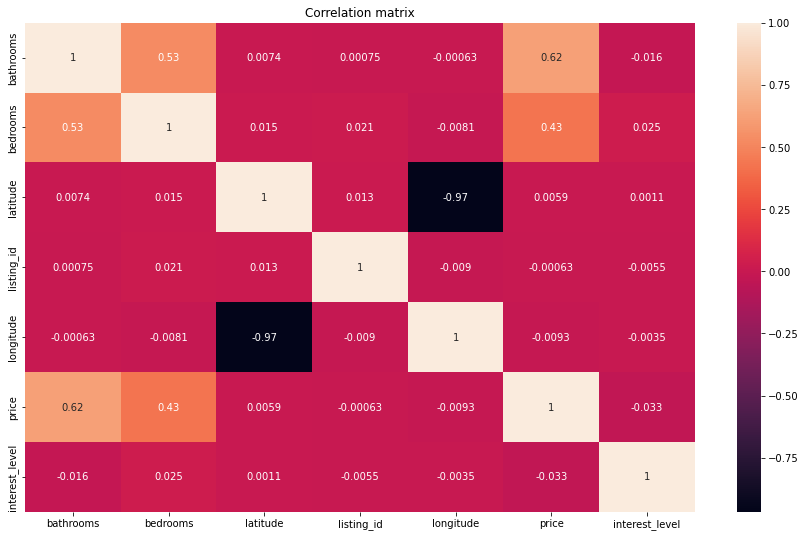

In [13]:
plt.figure(figsize=(15,9))
hm = sns.heatmap(df.corr(), annot = True)

hm.set(title = 'Correlation matrix')
plt.show()

In [15]:
X = df.drop('interest_level',axis=1)
y=df.interest_level
X= pd.DataFrame(scaler.fit_transform(X), columns = X.columns)
from sklearn.model_selection import train_test_split
X_train,X_test,y_train, y_test= train_test_split(X,y,train_size=0.3)

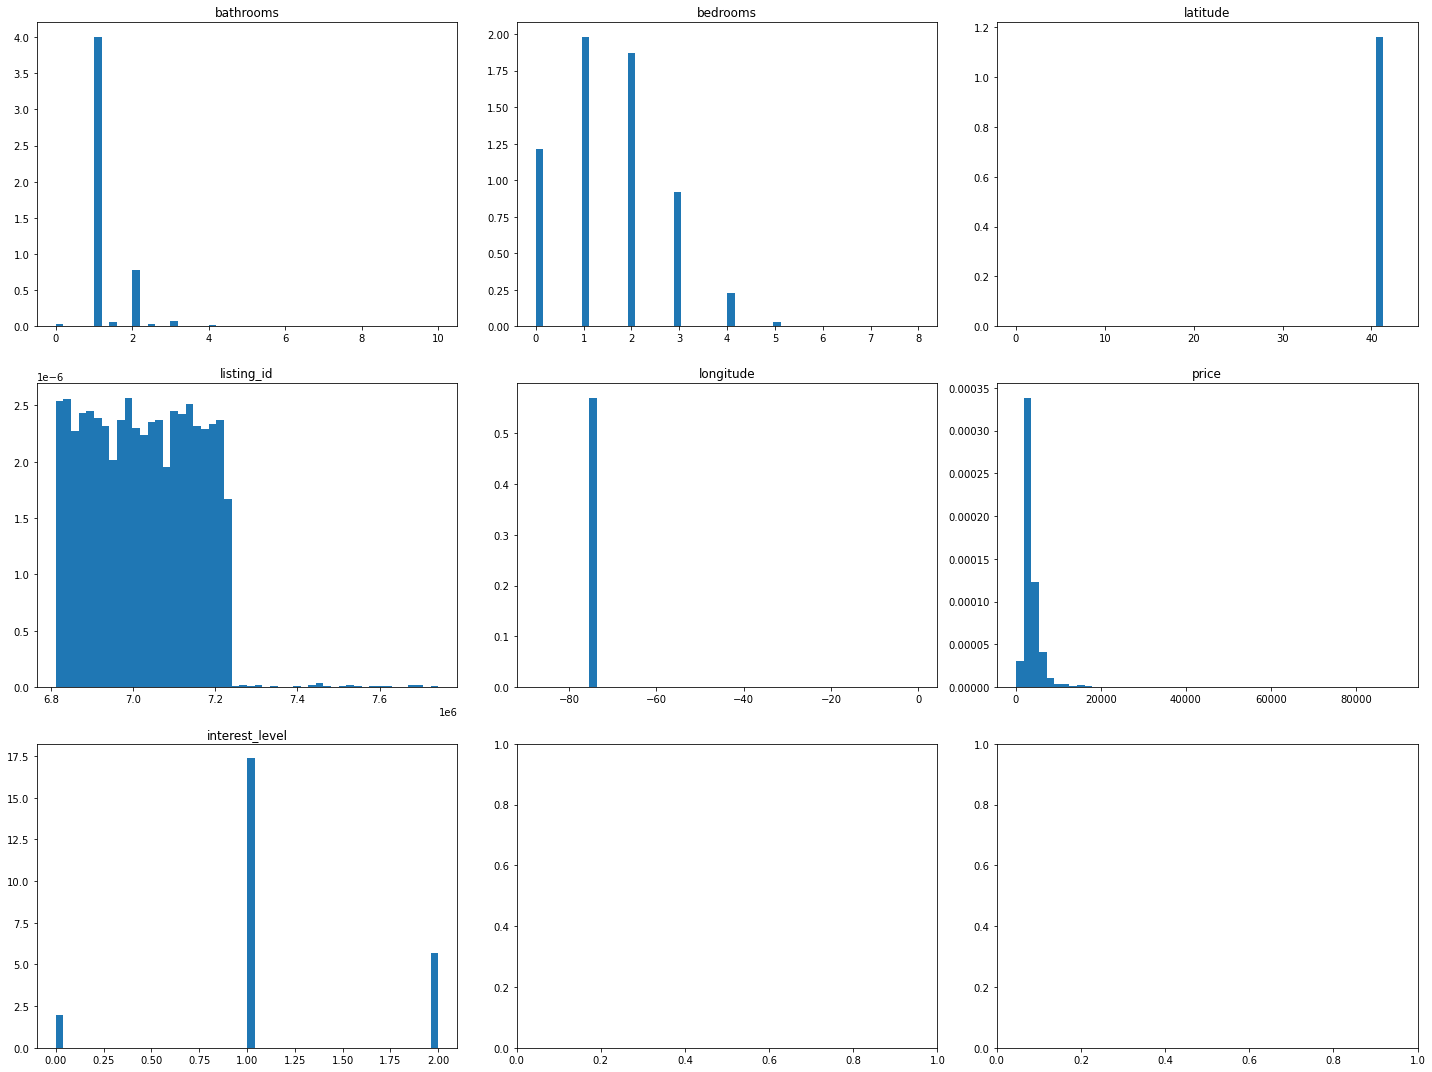

In [17]:
# Histogram of all numerical features
numerics= ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
new_df = df.select_dtypes(include = numerics)
numeric_Col = new_df.columns
num_cols= 3
n_bins = 50

num_rows = int(len(numeric_Col )/num_cols)+1

fig, axs = plt.subplots(num_rows, num_cols, tight_layout = True, figsize= (20,15))

for col, ax in zip(numeric_Col, axs.flatten()[:len(numeric_Col)]):
    ax.hist(new_df[col], bins = n_bins, density= True)
    ax.set_title(col)
plt.show()   

# Baseline: Decision Tree Classifier

In [19]:
from sklearn.tree import DecisionTreeClassifier
# evaluation imports
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold

In [49]:
# define the model
model = DecisionTreeClassifier()

# evaluate the model
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
n_scores = cross_val_score(model, X_test, y_test, scoring='neg_mean_squared_error', cv=cv, n_jobs=-1, error_score='raise')

# report performance
print('F1-Score: %.3f (%.3f)' % (np.mean(n_scores), np.std(n_scores)))

F1-Score: -0.562 (0.029)


In [50]:
model=DecisionTreeClassifier(max_depth=3)
model.fit(X_train,y_train)
pred2=model.predict(X_test)
accuracy_score(y_test,pred2)

0.6908827785817656

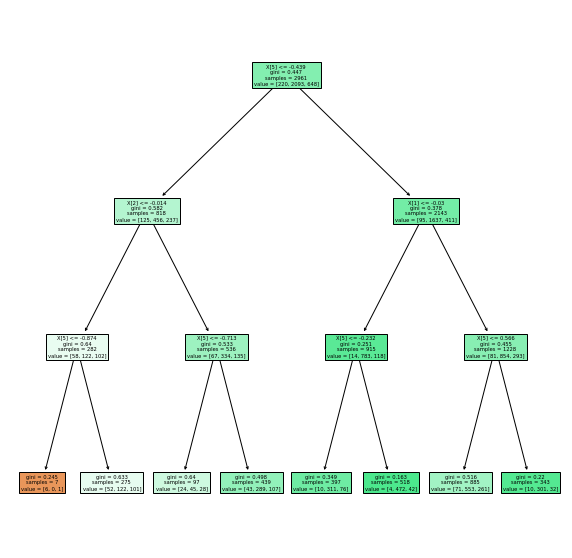

In [51]:
from sklearn import tree
import matplotlib.pyplot as plt
plt.figure(figsize=(10,10))
tree.plot_tree(model, filled=True,);

In [44]:
from sklearn.ensemble import RandomForestClassifier
# define the model
model = RandomForestClassifier()

# evaluate the model
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
n_scores = cross_val_score(model, X_test, y_test, scoring='neg_mean_squared_error', cv=cv, n_jobs=-1, error_score='raise')

# report performance
print('F1-Score: %.3f (%.3f)' % (np.mean(n_scores), np.std(n_scores)))

F1-Score: -0.417 (0.023)
